In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

# 하이퍼파라미터 튜닝 및 교차 검증을 위한 추가 임포트
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# 클러스터링을 위한 추가 임포트
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# 결측치 확인
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [7]:
# bmi열의 결측치에 bmi의 중앙값인 28.1을 입력함
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# 결측치 -> 중앙값으로 대체되었는지 확인용
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
# 성별이 Other인 row만 삭제 == 성별이 Other이 아닌 데이터들만 남기고 새로운 df인 df_g 만들기기
df_g = df[df['gender'] != "Other"].copy()
df_g

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
# 나이가 20세 미만인 row를 search
df_a = df_g[df_g['age'] >= 20.00 ].copy()
df_a

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


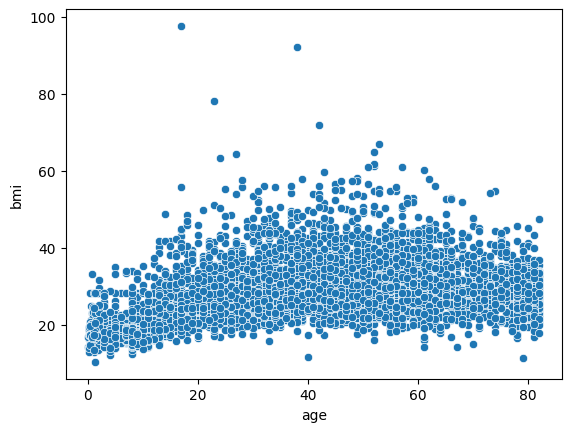

In [12]:
# bmi에서 이상치 찾음(97.6)
# bmi에 대한 scatter 또는 histogram으로 분포 확인 필요성 있음
# df로
sns.scatterplot(data=df, x='age', y='bmi')
plt.show()

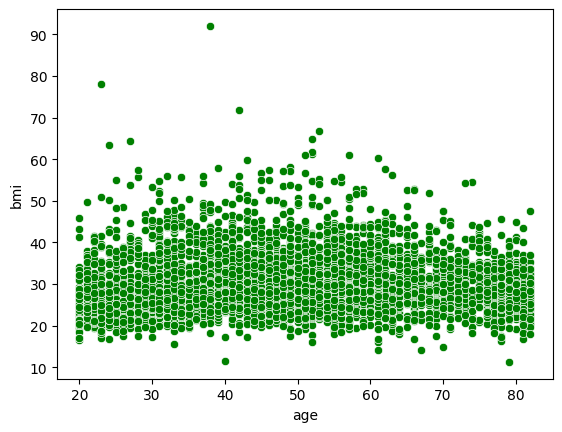

In [13]:
# df_a로
sns.scatterplot(data=df_a, x='age', y='bmi', color='green')
plt.show()

In [14]:
# --> df와 df_a의 결과가 같음
# outlier로 bmi >= 80을 제외하고 df 새로 만들기
# %%
print(df_a[df_a['bmi'] >= 80])
# %%
df_b = df_a[df_a['bmi'] < 80 ].copy()


         id gender   age  hypertension  heart_disease ever_married work_type  \
4209  51856   Male  38.0             1              0          Yes   Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
4209          Rural               56.9  92.0   never smoked       0  


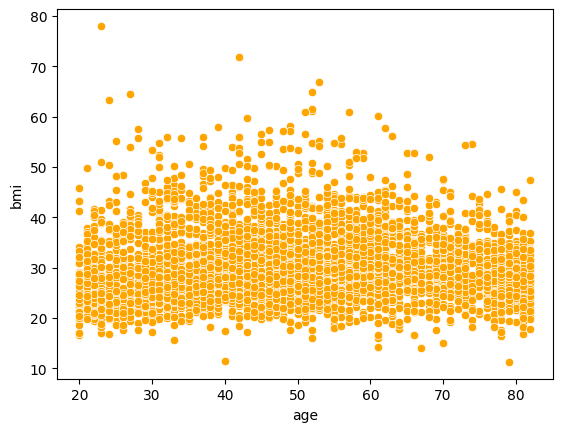

In [15]:
# scatter plot = df_b로
sns.scatterplot(data=df_b, x='age', y='bmi', color='orange')
plt.show()
# %%
# 범주형 데이터 인코딩 (Label Encoding 먼저, 그 다음 One-Hot Encoding)

In [16]:
# Label Encoding을 적용할 특성 리스트 (순서 중요: gender, ever_married, Residence_type)
# 이 특성들은 One-Hot Encoding 전에 변환되어야 합니다.
categorical_cols_label_encode = ['gender', 'ever_married', 'Residence_type']

# LabelEncoder 객체 생성 및 fit (이 객체들은 예측 시에도 사용되므로 전역 변수로 유지)
le_g = LabelEncoder()
df_b['gender'] = le_g.fit_transform(df_b['gender'])

le_e = LabelEncoder()
df_b['ever_married'] = le_e.fit_transform(df_b['ever_married'])

le_r = LabelEncoder()
df_b['Residence_type'] = le_r.fit_transform(df_b['Residence_type'])

In [18]:
#기존 것(Label Encoding)에서 One-Hot Encoding으로 바꿔봤습니다.
# One-Hot Encoding을 적용할 특성 리스트 ('work_type', 'smoking_status'만)
categorical_cols_one_hot = ['work_type', 'smoking_status']

# df_b 데이터프레임에 One-Hot Encoding 적용
# get_dummies()는 자동으로 숫자형 컬럼은 제외하고 문자열/범주형 컬럼만 인코딩합니다.
# drop_first=True는 첫 번째 더미 특성을 제거하여 다중공선성(multicollinearity) 문제를 방지합니다.
# dtype=int는 생성되는 더미 컬럼의 데이터 타입을 정수형으로 지정합니다.
df_b_encoded = pd.get_dummies(df_b, columns=categorical_cols_one_hot, drop_first=True, dtype=int)

In [19]:
# 이후 작업에서 df_b_encoded를 사용하므로 df_b 변수를 업데이트
df_b = df_b_encoded.copy()

In [21]:
# One-Hot Encoding 후 기존 Label Encoding 시각화/테스트 코드 제거
# sns.scatterplot(data=df_b, x='work_type', y='age', color='purple')
# plt.show()
# f = df_b[df_b['work_type'] == 1.0 ]
# f


# %%
# stroke를 target feature로 하기 위해서 데이터 프레임 reshape (이 부분은 One-Hot Encoding 후 컬럼 순서가 변경되므로 필요 없음)
# 필요한 특성만 X로 추출하고, 'stroke'를 y로 사용합니다.


# %%
# Feature Selection으로 가장 stroke에 영향력 있는 feature 알아보기
# One-Hot Encoding 후 컬럼명이 변경되므로, X_corr 정의 방식을 변경
# 'stroke'와 'id'를 제외한 모든 컬럼을 특성으로 사용
X_corr_features = df_b.drop(columns=['stroke', 'id']).columns
X_corr = df_b[X_corr_features] # 상관성 분석을 위한 X
y_corr = df_b['stroke'] # target 컬럼

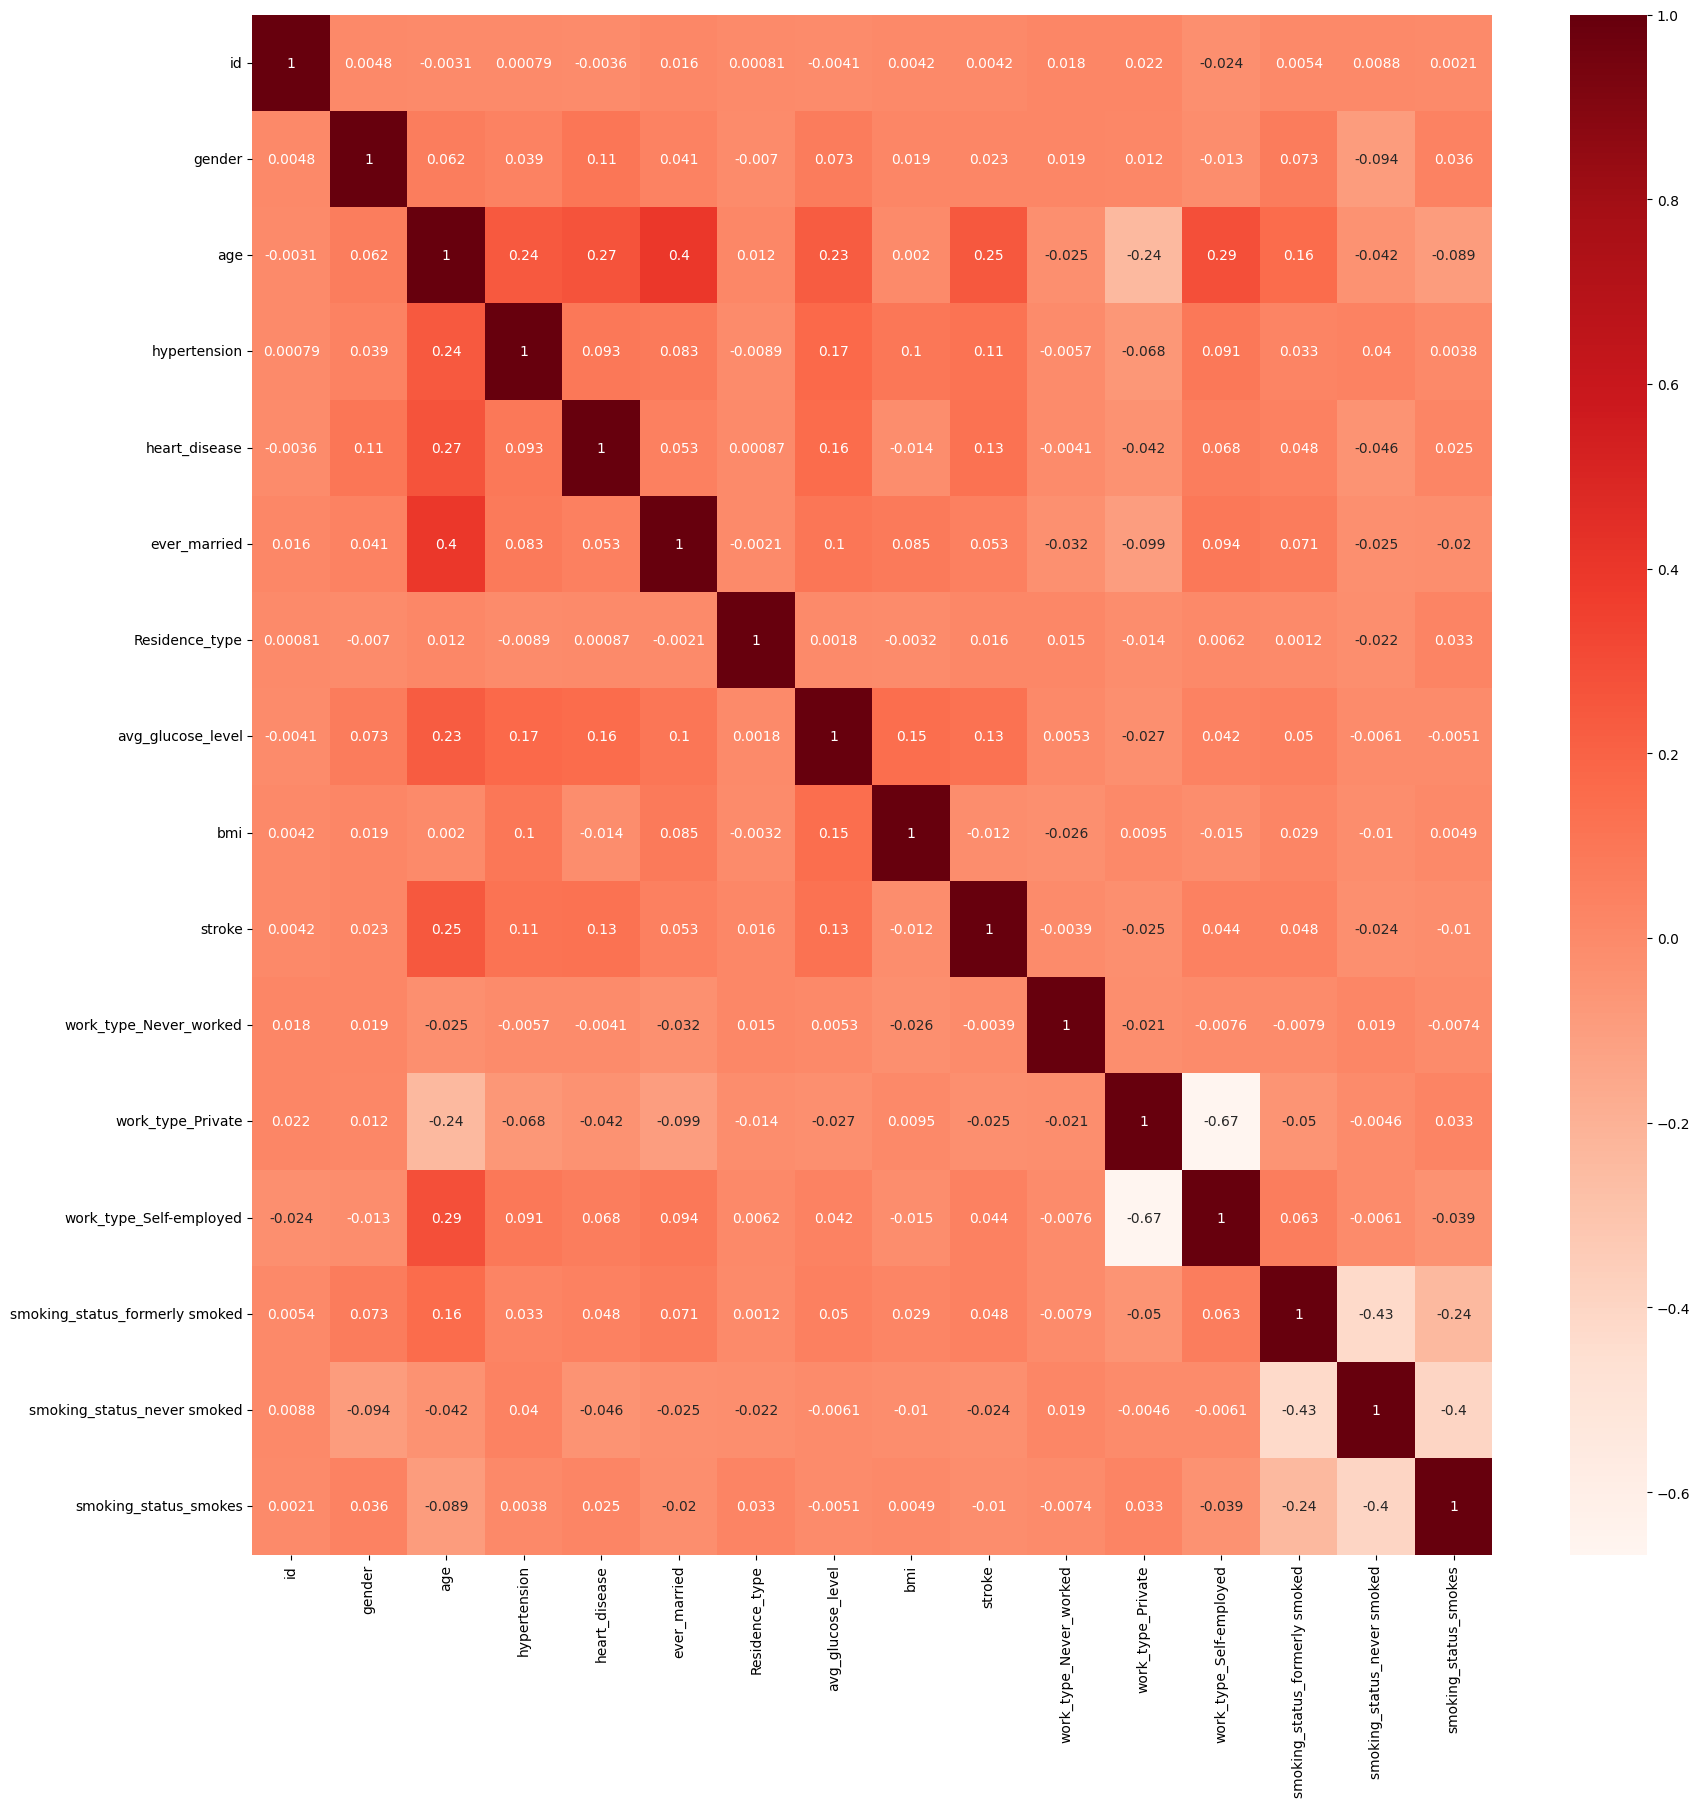

In [22]:
# 상관성
corrmat = df_b.corr() # 전체 데이터프레임으로 상관성 계산
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(df_b[top_corr_features].corr(),annot=True, cmap="Reds")
plt.show()


In [23]:
# heatmap은 별 필요가 없는 듯... string을 numeric으로 바꿔서 헷갈림
# %%
# Feature importance scoring
# X_feat_imp 정의 방식 변경: 'stroke'와 'id'를 제외한 모든 컬럼을 특성으로 사용
X_feat_imp = df_b.drop(columns=['stroke', 'id'])
y_feat_imp = df_b['stroke'] # target 컬럼

model_feat_imp = ExtraTreesClassifier(random_state=30) # 모델 이름 충돌 방지
model_feat_imp.fit(X_feat_imp, y_feat_imp)

print(model_feat_imp.feature_importances_)

[3.62036655e-02 2.64810852e-01 2.62332894e-02 2.47262650e-02
 1.88303491e-02 3.76561392e-02 2.63747118e-01 2.31206107e-01
 1.03711109e-05 2.21434929e-02 1.69754307e-02 1.63530483e-02
 2.22822759e-02 1.88215959e-02]


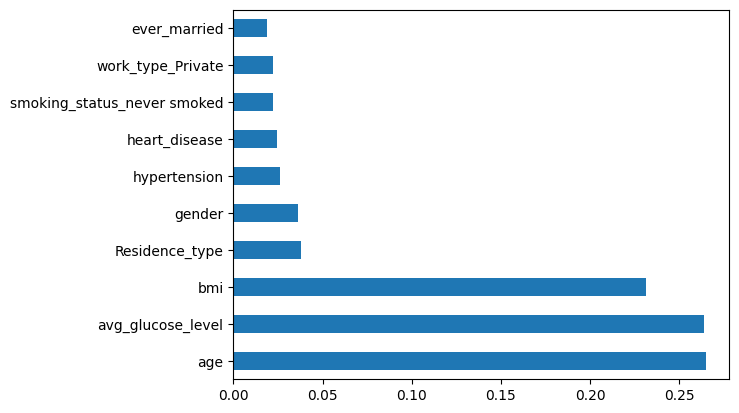

In [24]:
feat_importances = pd.Series(model_feat_imp.feature_importances_, index=X_feat_imp.columns)
feat_importances.nlargest(10).plot(kind='barh')

plt.show()

In [25]:
# age, 글루코스 평균 수치, bmi 가 가장 큰 3요소로 나타남
# %%
# SMOTE Test
# X_smote 정의 시 'id' 컬럼을 명시적으로 제외하여 모델 학습에 사용되지 않도록 합니다.
X_smote = df_b.drop(['stroke', 'id'], axis=1) # 타겟 속성 및 id 컬럼 제외
y_smote = df_b['stroke'] # 타겟

smote = SMOTE(random_state=30)
X_resampled, y_resampled = smote.fit_resample(X_smote, y_smote)

print("Original dataset shape: ", y_smote.value_counts())
print("Resampled dataset shape: ", pd.Series(y_resampled).value_counts())


Original dataset shape:  stroke
0    3895
1     247
Name: count, dtype: int64
Resampled dataset shape:  stroke
1    3895
0    3895
Name: count, dtype: int64


In [26]:
'''
SMOTE는 traning data에만 적용해야함, test dataset에 적용 X
범주형 데이터가 있으면 LabelEncoder 또는 OneHotEncoder 적용해야 SMOTE 작동함
'''
# %%
# SMOTE로 생성된 데이터를 DataFrame으로 변환
# df_resampled 생성 시에도 id 컬럼은 포함하지 않도록 합니다.
df_resampled = pd.DataFrame(X_resampled, columns=X_smote.columns)
df_resampled['stroke'] = y_resampled


In [27]:
# 상위 일부 행 출력
print(df_resampled.head())

# 클래스 분포 확인
print(df_resampled['stroke'].value_counts())

# 기본 통계 요약 보기
print(df_resampled.describe())

   gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       1  67.0             0              1             1               1   
1       0  61.0             0              0             1               0   
2       1  80.0             0              1             1               0   
3       0  49.0             0              0             1               1   
4       0  79.0             1              0             1               0   

   avg_glucose_level   bmi  work_type_Never_worked  work_type_Private  \
0             228.69  36.6                       0                  1   
1             202.21  28.1                       0                  0   
2             105.92  32.5                       0                  1   
3             171.23  34.4                       0                  1   
4             174.12  24.0                       0                  0   

   work_type_Self-employed  smoking_status_formerly smoked  \
0                        0    

In [28]:
# %%
df_resampled

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,67.000000,0,1,1,1,228.690000,36.600000,0,1,0,1,0,0,1
1,0,61.000000,0,0,1,0,202.210000,28.100000,0,0,1,0,1,0,1
2,1,80.000000,0,1,1,0,105.920000,32.500000,0,1,0,0,1,0,1
3,0,49.000000,0,0,1,1,171.230000,34.400000,0,1,0,0,0,1,1
4,0,79.000000,1,0,1,0,174.120000,24.000000,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,0,51.173761,0,0,1,0,103.492554,27.300000,0,0,0,0,0,0,1
7786,0,81.000000,0,0,1,0,79.506490,21.655916,0,0,0,0,0,0,1
7787,0,58.016940,0,0,1,0,198.889814,36.704415,0,0,0,0,0,0,1
7788,1,76.491036,0,0,1,1,220.569332,26.943128,0,1,0,0,0,0,1


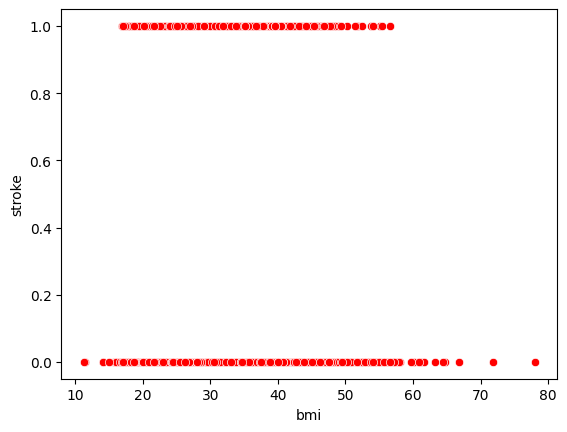

In [29]:
# Feature importance scoring (SMOTE 적용 후 데이터에 대한 시각화)
# 이 부분은 이미 위에서 수행되었으므로, SMOTE 적용 후 데이터에 대한 간단한 확인용으로 남겨둡니다.
# sns.scatterplot(data=df_resampled, x='bmi', y='stroke', color='red')
# plt.show()
# stroke = 1 합성 데이터 생성되었는지 간단히 확인

# 2. 모델 선택 및 학습

In [31]:
# X와 y 분리 (id 컬럼 제외)
# 'id' 컬럼이 df_resampled에 포함되지 않도록 SMOTE 단계에서 명확히 제거되었으므로,
# 여기서도 'stroke'만 제거하면 됩니다.
X = df_resampled.drop('stroke', axis=1)
y = df_resampled['stroke']

# 특성 스케일링 (선택 사항이지만 대부분의 모델에서 성능 향상에 도움을 줍니다)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.485181,0.451986,-0.331667,4.16805,0.490151,1.198607,1.948508,1.044532,-0.011331,0.947219,-0.401837,2.426460,-0.640676,-0.365042
1,-0.673319,0.100322,-0.331667,-0.23992,0.490151,-0.834302,1.474297,-0.329360,-0.011331,-1.055722,2.488570,-0.412123,1.560852,-0.365042
2,1.485181,1.213925,-0.331667,4.16805,0.490151,-0.834302,-0.250089,0.381831,-0.011331,0.947219,-0.401837,-0.412123,1.560852,-0.365042
3,-0.673319,-0.603007,-0.331667,-0.23992,0.490151,1.198607,0.919499,0.688936,-0.011331,0.947219,-0.401837,-0.412123,-0.640676,2.739410
4,-0.673319,1.155314,3.015074,-0.23992,0.490151,-0.834302,0.971254,-0.992060,-0.011331,-1.055722,2.488570,-0.412123,1.560852,-0.365042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,-0.673319,-0.475601,-0.331667,-0.23992,0.490151,-0.834302,-0.293561,-0.458667,-0.011331,-1.055722,-0.401837,-0.412123,-0.640676,-0.365042
7786,-0.673319,1.272536,-0.331667,-0.23992,0.490151,-0.834302,-0.723110,-1.370945,-0.011331,-1.055722,-0.401837,-0.412123,-0.640676,-0.365042
7787,-0.673319,-0.074518,-0.331667,-0.23992,0.490151,-0.834302,1.414839,1.061409,-0.011331,-1.055722,-0.401837,-0.412123,-0.640676,-0.365042
7788,1.485181,1.008262,-0.331667,-0.23992,0.490151,1.198607,1.803081,-0.516350,-0.011331,0.947219,-0.401837,-0.412123,-0.640676,-0.365042


--- Determining Optimal K for Clustering (Elbow Method) ---


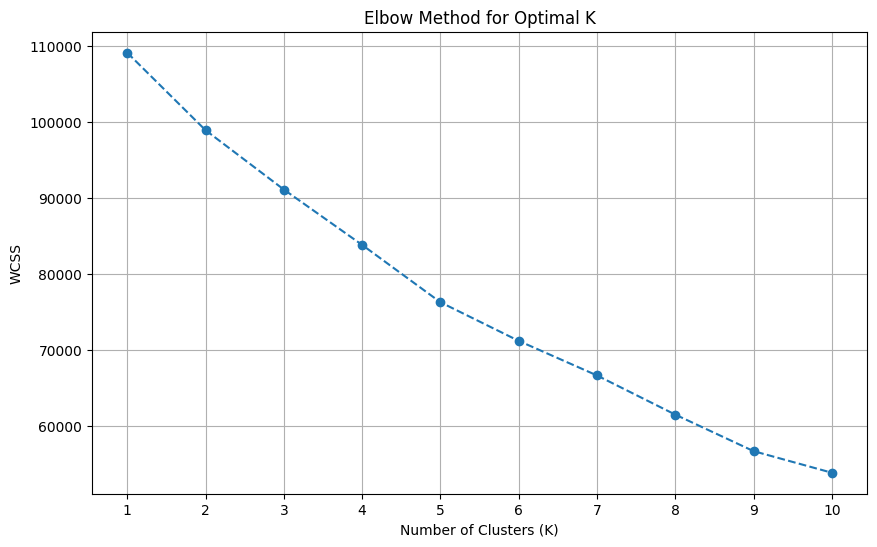

Elbow Method plot for optimal K generated. Please examine the plot to determine the optimal 'K' value.


In [32]:
# 2-1. 클러스터링 개수 (K) 결정 및 적용 (엘보우 메서드 후 K 결정)

print("--- Determining Optimal K for Clustering (Elbow Method) ---")

# WCSS (Within-Cluster Sum of Squares) - 엘보우 메서드
wcss = []
for i in range(1, 11): # 클러스터 개수를 1개부터 10개까지 변화
    kmeans_eval = KMeans(n_clusters=i, random_state=30, n_init=10)
    kmeans_eval.fit(X_scaled)
    wcss.append(kmeans_eval.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()
print("Elbow Method plot for optimal K generated. Please examine the plot to determine the optimal 'K' value.")

In [33]:
# 최적의 K 값 설정
optimal_k = 2 # label enciding 일 때는 2에서 Silhouette Score(얼마나 클러스터들이 잘 나뉘어졌는지)이 0.4정도로 나왔는데, one-hot-encoding에서는 0.1~0.15를 벗어나지는 못하네요. 하지만 정확도 측면에서는 굉장한 상승세가 있었기에 이 버젼으로 올릴게요
print(f"\nOptimal K selected: {optimal_k}")


Optimal K selected: 2


In [34]:
# K-Means 클러스터링 적용
print("\n--- Applying K-Means Clustering with Optimal K ---")
kmeans = KMeans(n_clusters=optimal_k, random_state=30, n_init=10)
kmeans.fit(X_scaled) # 스케일링된 데이터에 클러스터링 적용


--- Applying K-Means Clustering with Optimal K ---


KMeans(n_clusters=2, n_init=10, random_state=30)

In [35]:
# 클러스터 라벨을 DataFrame에 새로운 특성으로 추가
X_clustered = X_scaled.copy()
X_clustered['cluster_label'] = kmeans.labels_

In [36]:
print(f"Cluster Center:\n{kmeans.cluster_centers_}")
print(f"Value Count by Cluster:\n{pd.Series(kmeans.labels_).value_counts()}")
print("Clustering applied. 'cluster_label' feature added.")

Cluster Center:
[[-0.12390417  0.34562546  0.01975025 -0.00849584  0.04014359 -0.04527817
  -0.00797681 -0.09682042 -0.01133076 -1.05572222  0.45861127 -0.03135641
  -0.04823595 -0.12525349]
 [ 0.10856536 -0.3028385  -0.01730525  0.00744409 -0.03517398  0.03967293
   0.00698931  0.08483446  0.00992806  0.92502828 -0.40183714  0.02747462
   0.04226455  0.10974764]]
Value Count by Cluster:
1    4149
0    3641
Name: count, dtype: int64
Clustering applied. 'cluster_label' feature added.


In [38]:
# 클러스터링 결과 시각화 (PCA 사용)
# -----------------------------------------------------------------------------
print("--- Visualizing Clusters with PCA ---")

# PCA 적용 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) # 스케일링된 데이터에 PCA 적용
print("PCA Components (Loadings):")
# X.columns는 원본 특성들의 순서를 나타냅니다.
# pca.components_는 각 주성분(행)이 원본 특성(열)에 대한 계수를 가집니다.
pca_components_df = pd.DataFrame(pca.components_, columns=X.columns,
                                 index=[f'Principal Component {i+1}' for i in range(pca.n_components_)])
pca_components_df

--- Visualizing Clusters with PCA ---
PCA Components (Loadings):


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
Principal Component 1,-0.033988,0.553728,0.217087,0.175532,0.272030,-0.115170,0.271139,-0.012168,-0.026075,-0.475394,0.389888,0.129820,-0.107437,-0.215115
Principal Component 2,0.347499,0.005422,0.111334,0.277938,0.259014,0.025177,0.429627,0.359210,-0.036304,0.364329,-0.255285,0.270079,-0.315751,0.190713


In [39]:
"""
AI 정리
종합 결론:
Principal Component 1은 데이터셋에서 가장 큰 분산을 설명하며, 주로 환자의 **임상적 건강 상태 및 주요 위험 요인(나이, 혈당, 심장 질환, 고혈압)**을 대표하는 축입니다.
Principal Component 2는 두 번째로 큰 분산을 설명하며, 주로 환자의 **생활 습관 및 사회적/환경적 요인(흡연, 성별, BMI, 거주/직업 유형)**을 대표하는 축입니다.
"""

'\nAI 정리\n종합 결론:\nPrincipal Component 1은 데이터셋에서 가장 큰 분산을 설명하며, 주로 환자의 **임상적 건강 상태 및 주요 위험 요인(나이, 혈당, 심장 질환, 고혈압)**을 대표하는 축입니다.\nPrincipal Component 2는 두 번째로 큰 분산을 설명하며, 주로 환자의 **생활 습관 및 사회적/환경적 요인(흡연, 성별, BMI, 거주/직업 유형)**을 대표하는 축입니다.\n'

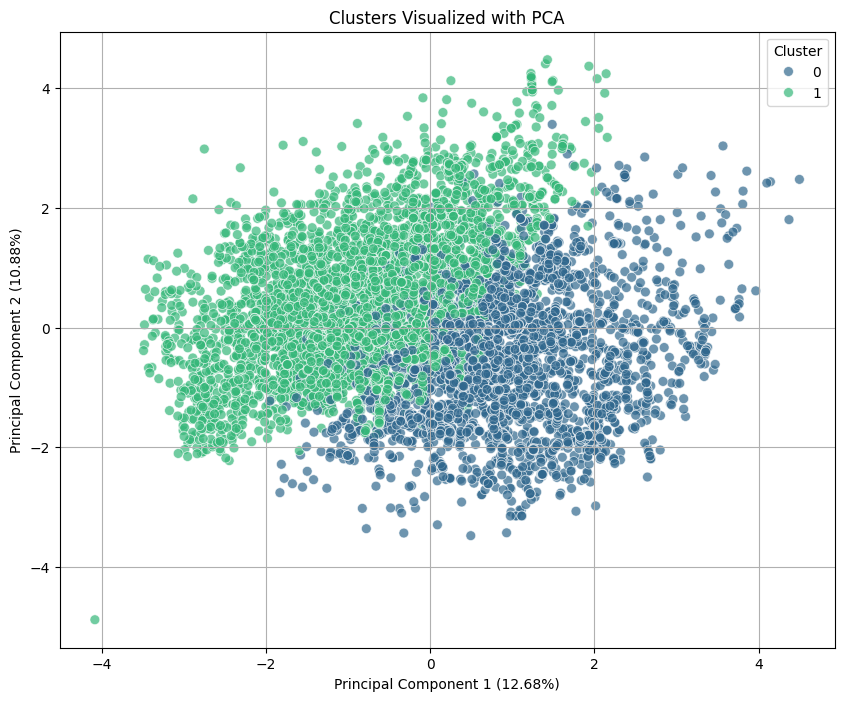

Clusters visualized using PCA components.


In [40]:
# PCA 결과를 DataFrame으로 변환
X_pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
X_pca_df['cluster_label'] = kmeans.labels_ # 클러스터 라벨 추가

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2',
                hue='cluster_label', data=X_pca_df, palette='viridis', s=50, alpha=0.7)
plt.title('Clusters Visualized with PCA')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
print("Clusters visualized using PCA components.")

In [41]:
# 실루엣 스코어
# 클러스터링이 잘 되었는지 정량적으로 평가
if len(np.unique(kmeans.labels_)) > 1:
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Silhouette Score cannot be calculated for a single cluster.")

print("\n--- Cluster Characteristics Analysis ---")

Silhouette Score: 0.1094

--- Cluster Characteristics Analysis ---


In [44]:
# 각 클러스터의 특성별 평균값을 계산하여 클러스터의 특징을 파악
cluster_centers_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
cluster_centers_df['Cluster Size'] = pd.Series(kmeans.labels_).value_counts().sort_index()


print("Cluster characteristics analysis complete. This helps to understand what each cluster represents.")
cluster_centers_df

Cluster characteristics analysis complete. This helps to understand what each cluster represents.


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Cluster Size
0,0.254535,65.185310,0.105003,0.052501,0.822155,0.388125,119.439603,29.538676,-5.149960e-18,-2.442491e-14,2.976910e-01,0.134140,0.269104,0.077240,3641
1,0.362235,54.121393,0.093931,0.056118,0.792389,0.429913,120.275313,30.662540,2.408478e-04,9.889210e-01,-2.609024e-15,0.154865,0.310212,0.152938,4149


In [45]:
# 훈련 세트와 테스트 세트 분리 (클러스터 라벨이 추가된 데이터 사용)
X_train, X_test, y_train, y_test = train_test_split(X_clustered, y, test_size=0.25, random_state=30, stratify=y)

print("--- Data Split Complete (Including Cluster Feature) ---")
print(f"Training set shape (X_train): {X_train.shape}")
print(f"Test set shape (X_test): {X_test.shape}")
print(f"Training set stroke ratio:\n{y_train.value_counts(normalize=True)}")
print(f"Test set stroke ratio:\n{y_test.value_counts(normalize=True)}")
print("\n")

--- Data Split Complete (Including Cluster Feature) ---
Training set shape (X_train): (5842, 15)
Test set shape (X_test): (1948, 15)
Training set stroke ratio:
stroke
0    0.5
1    0.5
Name: proportion, dtype: float64
Test set stroke ratio:
stroke
1    0.5
0    0.5
Name: proportion, dtype: float64




# 2-2. 로지스틱 회귀 모델 학습

In [46]:
# 로지스틱 회귀 (Logistic Regression) 모델
print("--- Starting Logistic Regression Model Training ---")
log_reg_model = LogisticRegression(random_state=30, solver='liblinear')
log_reg_model.fit(X_train, y_train)
print("Logistic Regression Model Training Complete.")
print("\n")

print("All models have been successfully trained. You can now proceed to model evaluation.")

# 학습된 모델 객체들을 변수로 저장하여 다음 단계에서 사용할 수 있도록 합니다.

--- Starting Logistic Regression Model Training ---
Logistic Regression Model Training Complete.


All models have been successfully trained. You can now proceed to model evaluation.


# 3. 학습된 모델 시각화 (로지스틱 회귀만 해당)

--- Starting Trained Model Visualization ---


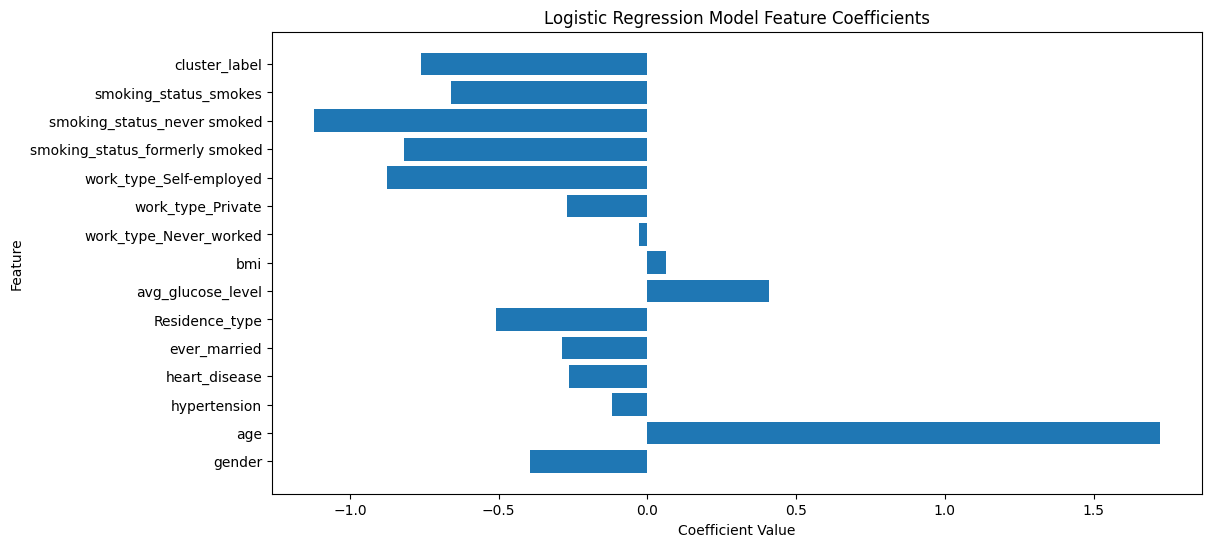

Logistic Regression Model Feature Coefficients Visualization Complete.


Model visualization is complete.


In [47]:
print("--- Starting Trained Model Visualization ---")

# 로지스틱 회귀 모델의 계수 시각화
# 각 특성이 뇌졸중 발병에 미치는 영향력을 보여줍니다.
plt.figure(figsize=(12, 6))
# X.columns 대신 X_train.columns를 사용하여 모델이 학습된 특성 이름 사용
plt.barh(X_train.columns, log_reg_model.coef_[0])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title('Logistic Regression Model Feature Coefficients')
plt.show()
print("Logistic Regression Model Feature Coefficients Visualization Complete.")
print("\n")

print("Model visualization is complete.")

# 4. 하이퍼파라미터 튜닝 및 교차 검증 (로지스틱 회귀만 해당)


In [48]:
print("--- Starting Hyperparameter Tuning and Cross-Validation ---")

# 1. 로지스틱 회귀 모델 튜닝
print("\n--- Starting Logistic Regression Model Hyperparameter Tuning ---")
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=30), param_grid_lr, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

print(f"Logistic Regression Best Hyperparameters: {grid_search_lr.best_params_}")
print(f"Logistic Regression Best ROC-AUC Score: {grid_search_lr.best_score_:.4f}")

best_lr_model = grid_search_lr.best_estimator_
print("Logistic Regression Model Tuning Complete.")

print("\n--- Optimal Model Performance Evaluation (Test Set) ---")

--- Starting Hyperparameter Tuning and Cross-Validation ---

--- Starting Logistic Regression Model Hyperparameter Tuning ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Logistic Regression Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Best ROC-AUC Score: 0.9291
Logistic Regression Model Tuning Complete.

--- Optimal Model Performance Evaluation (Test Set) ---


In [49]:
# 로지스틱 회귀 모델 평가
print("\n--- Logistic Regression Model Test Set Evaluation ---")
y_pred_lr = best_lr_model.predict(X_test)
y_prob_lr = best_lr_model.predict_proba(X_test)[:, 1]



--- Logistic Regression Model Test Set Evaluation ---


In [51]:
# 모델 정확도 (Accuracy) 추가
accuracy_lr = best_lr_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy_lr:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Stroke', 'Stroke']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_lr):.4f}")

Model Accuracy: 0.8347
Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.83      0.84      0.84       974
      Stroke       0.84      0.83      0.83       974

    accuracy                           0.83      1948
   macro avg       0.83      0.83      0.83      1948
weighted avg       0.83      0.83      0.83      1948

Confusion Matrix:
[[820 154]
 [168 806]]
ROC-AUC Score: 0.9191


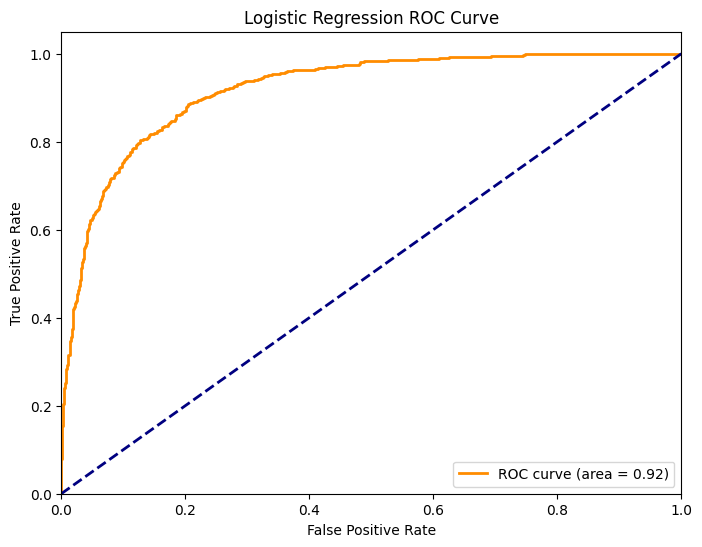

Hyperparameter tuning, cross-validation, and final model evaluation are complete.


In [52]:
# ROC Curve 시각화 (로지스틱 회귀)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("Hyperparameter tuning, cross-validation, and final model evaluation are complete.")

# 5. 새로운 환자 정보로 뇌졸중 확률 예측

In [53]:
print("\n--- Predicting Stroke Probability for New Patient ---")

# --- 1. 예측할 환자 정보 입력 ---

new_patient_data = {
    'gender': 'Female',         # 'Male' 또는 'Female'
    'age': 65.0,                # 나이 (float)
    'hypertension': 0,          # 고혈압 (0 또는 1)
    'heart_disease': 0,         # 심장병 (0 또는 1)
    'avg_glucose_level': 100.0, # 평균 포도당 수치 (float)
    'bmi': 28.0,                # BMI (float)
    'work_type': 'Private',     # 'Private', 'Self-employed', 'Govt_job', 'Never_worked'
    'smoking_status': 'never smoked', # 'never smoked', 'formerly smoked', 'smokes', 'Unknown'
    'Residence_type': 'Urban',  # 'Urban' 또는 'Rural'
    'ever_married': 'Yes'       # 'Yes' 또는 'No'
}

# 입력 데이터를 DataFrame으로 변환
new_patient_df = pd.DataFrame([new_patient_data])

print("Input Patient Data:")
print(new_patient_df)



--- Predicting Stroke Probability for New Patient ---
Input Patient Data:
   gender   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0  Female  65.0             0              0              100.0  28.0   

  work_type smoking_status Residence_type ever_married  
0   Private   never smoked          Urban          Yes  


In [54]:
# --- 2. 입력 데이터 전처리 (훈련 데이터와 동일한 방식 적용) ---

# Label Encoding 적용 (훈련에 사용된 le_g, le_r, le_e 객체 활용)
# le_g, le_r, le_e는 team.py 실행 시 전역 변수로 정의됩니다.
new_patient_df['gender'] = le_g.transform(new_patient_df['gender'])
new_patient_df['Residence_type'] = le_r.transform(new_patient_df['Residence_type'])
new_patient_df['ever_married'] = le_e.transform(new_patient_df['ever_married'])


In [55]:
# One-Hot Encoding 적용 work_type, smoking_status
categorical_cols_one_hot_predict = ['work_type', 'smoking_status']
new_patient_df = pd.get_dummies(new_patient_df, columns=categorical_cols_one_hot_predict, drop_first=True, dtype=int)

final_prediction_data_aligned = new_patient_df.reindex(columns=X.columns, fill_value=0)

In [56]:
# 훈련에 사용된 scaler 객체 활용
new_patient_scaled = scaler.transform(final_prediction_data_aligned)
new_patient_scaled_df = pd.DataFrame(new_patient_scaled, columns=final_prediction_data_aligned.columns)


In [57]:
# 클러스터 라벨 예측
predicted_cluster_label = kmeans.predict(new_patient_scaled_df)
new_patient_scaled_df['cluster_label'] = predicted_cluster_label[0]

final_prediction_data = new_patient_scaled_df

print("\nProcessed Patient Data (Scaled + Cluster Label):")
print(final_prediction_data)



Processed Patient Data (Scaled + Cluster Label):
     gender       age  hypertension  heart_disease  ever_married  \
0 -0.673319  0.334764     -0.331667       -0.23992      0.490151   

   Residence_type  avg_glucose_level       bmi  work_type_Never_worked  \
0        1.198607          -0.356106 -0.345523               -0.011331   

   work_type_Private  work_type_Self-employed  smoking_status_formerly smoked  \
0          -1.055722                -0.401837                       -0.412123   

   smoking_status_never smoked  smoking_status_smokes  cluster_label  
0                    -0.640676              -0.365042              0  


In [58]:
# --- 3. 뇌졸중 발병 확률 예측 ---
stroke_probability = best_lr_model.predict_proba(final_prediction_data)[:, 1] # 뇌졸중(클래스 1)

print(f"\nPredicted probability of stroke: {stroke_probability[0]:.4f}")



Predicted probability of stroke: 0.9124


In [59]:
# --- 4. 예측 결과 해석 ---
if stroke_probability[0] >= 0.5: # 일반적으로 0.5를 임계값으로 사용
    print("Based on the provided data, the model predicts a higher likelihood of stroke.")
else:
    print("Based on the provided data, the model predicts a lower likelihood of stroke.")

print("\n--- Prediction Complete ---")



Based on the provided data, the model predicts a higher likelihood of stroke.

--- Prediction Complete ---


# 5. 새로운 환자 정보로 뇌졸중 확률 예측
### (team.py 실행 후 동일 세션에서 실행 필요)

In [60]:
print("하이퍼파라미터 튜닝, 교차 검증, 최종 모델 평가가 완료되었습니다.")

# 새로운 환자 정보로 뇌졸중 확률 예측
print("\n--- 새로운 환자 뇌졸중 확률 예측 ---")

# 예측할 환자 정보 입력 (다양한 나이대 포함)
new_patients_data = [
    {
        'gender': 'Female', 'age': 30.0, 'hypertension': 0, 'heart_disease': 0,
        'avg_glucose_level': 90.0, 'bmi': 25.0, 'work_type': 'Private',
        'smoking_status': 'never smoked', 'Residence_type': 'Urban', 'ever_married': 'Yes'
    },
    {
        'gender': 'Male', 'age': 55.0, 'hypertension': 1, 'heart_disease': 0,
        'avg_glucose_level': 130.0, 'bmi': 30.0, 'work_type': 'Self-employed',
        'smoking_status': 'formerly smoked', 'Residence_type': 'Rural', 'ever_married': 'Yes'
    },
    {
        'gender': 'Female', 'age': 75.0, 'hypertension': 0, 'heart_disease': 1,
        'avg_glucose_level': 200.0, 'bmi': 35.0, 'work_type': 'Private',
        'smoking_status': 'smokes', 'Residence_type': 'Urban', 'ever_married': 'Yes'
    },
    {
        'gender': 'Male', 'age': 25.0, 'hypertension': 0, 'heart_disease': 0,
        'avg_glucose_level': 80.0, 'bmi': 22.0, 'work_type': 'Govt_job',
        'smoking_status': 'never smoked', 'Residence_type': 'Rural', 'ever_married': 'No'
    },
    {
        'gender': 'Female', 'age': 65.0, 'hypertension': 0, 'heart_disease': 0,
        'avg_glucose_level': 100.0, 'bmi': 28.0, 'work_type': 'Private',
        'smoking_status': 'never smoked', 'Residence_type': 'Urban', 'ever_married': 'Yes'
    }
]

하이퍼파라미터 튜닝, 교차 검증, 최종 모델 평가가 완료되었습니다.

--- 새로운 환자 뇌졸중 확률 예측 ---


In [61]:
for i, patient_data in enumerate(new_patients_data):
    print(f"\n--- 환자 {i+1} 정보 예측 ---")
    new_patient_df = pd.DataFrame([patient_data])

    print("입력 환자 데이터:")
    print(new_patient_df)

    # 입력 데이터 전처리 (훈련 데이터와 동일한 방식 적용)
    new_patient_df['gender'] = le_g.transform(new_patient_df['gender'])
    new_patient_df['Residence_type'] = le_r.transform(new_patient_df['Residence_type'])
    new_patient_df['ever_married'] = le_e.transform(new_patient_df['ever_married'])

    categorical_cols_one_hot_predict = ['work_type', 'smoking_status']
    new_patient_df = pd.get_dummies(new_patient_df, columns=categorical_cols_one_hot_predict, drop_first=True, dtype=int)

    # 훈련 데이터(X)의 컬럼 순서와 이름에 맞게 예측 데이터 정렬
    final_prediction_data_aligned = new_patient_df.reindex(columns=X.columns, fill_value=0)

    # 특성 스케일링 적용
    new_patient_scaled = scaler.transform(final_prediction_data_aligned)
    new_patient_scaled_df = pd.DataFrame(new_patient_scaled, columns=final_prediction_data_aligned.columns)

    # 클러스터 라벨 예측
    predicted_cluster_label = kmeans.predict(new_patient_scaled_df)
    new_patient_scaled_df['cluster_label'] = predicted_cluster_label[0] # 예측은 배열로 나오므로 첫 번째 요소 사용

    # 예측을 위한 최종 데이터 준비
    final_prediction_data = new_patient_scaled_df

    print("\n처리된 환자 데이터 (스케일링 + 클러스터 라벨):")
    print(final_prediction_data)

    # 뇌졸중 발병 확률 예측
    stroke_probability = best_lr_model.predict_proba(final_prediction_data)[:, 1] # 뇌졸중(클래스 1) 확률

    print(f"\n예측된 뇌졸중 확률: {stroke_probability[0]:.4f}")

    # 예측 결과 해석
    if stroke_probability[0] >= 0.5: # 일반적으로 0.5를 임계값으로 사용
        print("뇌졸중 발생 가능성이 높다고 예측합니다.")
    else:
        print("뇌졸중 발생 가능성이 낮다고 예측합니다.")

print("\n--- 모든 환자 예측 완료 ---")


--- 환자 1 정보 예측 ---
입력 환자 데이터:
   gender   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0  Female  30.0             0              0               90.0  25.0   

  work_type smoking_status Residence_type ever_married  
0   Private   never smoked          Urban          Yes  

처리된 환자 데이터 (스케일링 + 클러스터 라벨):
     gender      age  hypertension  heart_disease  ever_married  \
0 -0.673319 -1.71661     -0.331667       -0.23992      0.490151   

   Residence_type  avg_glucose_level       bmi  work_type_Never_worked  \
0        1.198607          -0.535189 -0.830426               -0.011331   

   work_type_Private  work_type_Self-employed  smoking_status_formerly smoked  \
0          -1.055722                -0.401837                       -0.412123   

   smoking_status_never smoked  smoking_status_smokes  cluster_label  
0                    -0.640676              -0.365042              0  

예측된 뇌졸중 확률: 0.2133
뇌졸중 발생 가능성이 낮다고 예측합니다.

--- 환자 2 정보 예측 ---
입력 환자 데이터:
  gender   age 